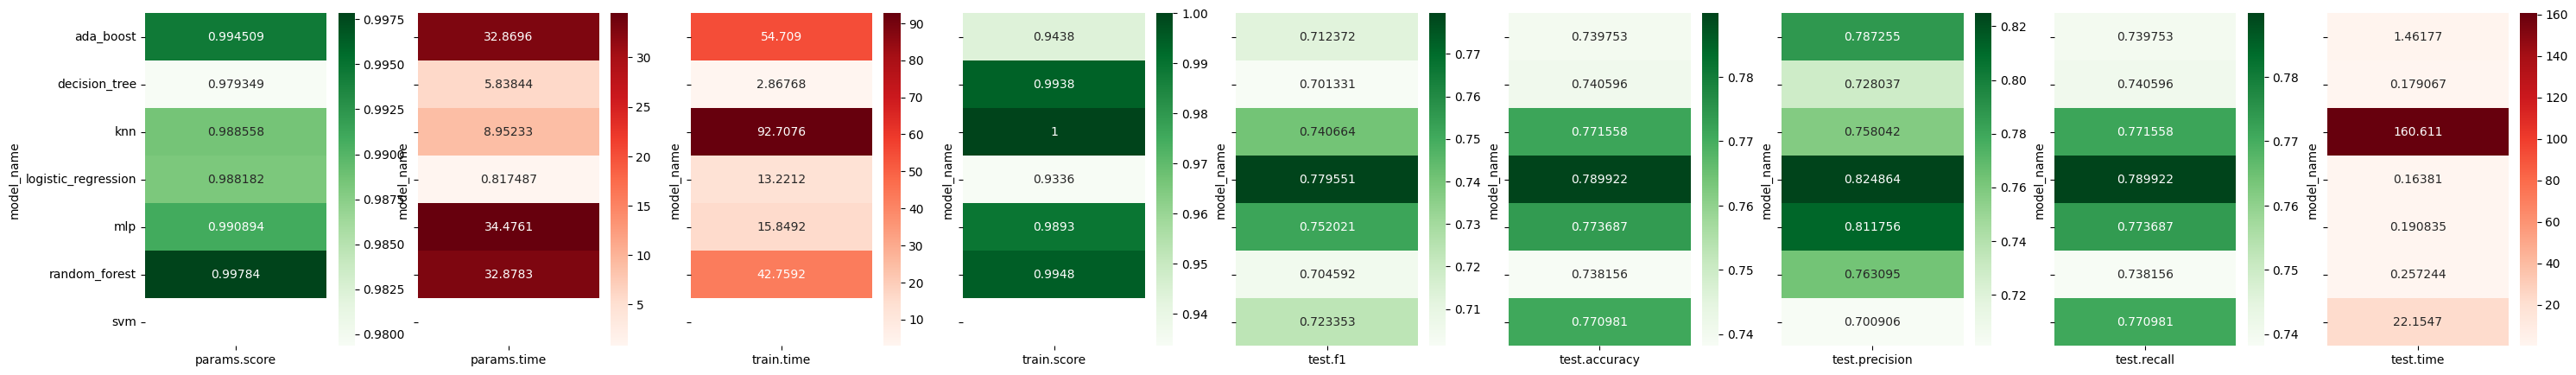

,model_name,params.score,params.time,train.time,train.score,test.f1,test.accuracy,test.precision,test.recall,test.time
0,decision_tree,0.979349,5.838437,2.867676,0.9938,0.701331,0.740596,0.728037,0.740596,0.179067
1,random_forest,0.997840,32.878276,42.759203,0.9948,0.704592,0.738156,0.763095,0.738156,0.257244
2,knn,0.988558,8.952334,92.707562,1.0000,0.740664,0.771558,0.758042,0.771558,160.610546
3,logistic_regression,0.988182,0.817487,13.221244,0.9336,0.779551,0.789922,0.824864,0.789922,0.163810
4,mlp,0.990894,34.476081,15.849235,0.9893,0.752021,0.773687,0.811756,0.773687,0.190835
5,ada_boost,0.994509,32.869621,54.709019,0.9438,0.712372,0.739753,0.787255,0.739753,1.461767
6,svm,NaN,NaN,NaN,NaN,0.723353,0.770981,0.700906,0.770981,22.154708


In [5]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


def process_results(file_name):
    with open(file_name) as f:
        results = json.load(f)

    processed = []
    for model_name in results:
        res = results[model_name]
        res['model_name'] = model_name

        processed.append(
            res
        )

    return processed


def generate_heatmaps(normalised):
    figure, axes = plt.subplots(1, 9, figsize=(4*9, 5), sharey=True)

    cmaps = ['Greens', 'Reds', 'Reds', 'Greens', 'Greens', 'Greens', 'Greens', 'Greens', 'Reds']

    # create heat maps for each of the columns of the normalised dataframe
    for i, (col, cmap) in enumerate(zip(normalised.columns[1:], cmaps)):
        if col == 'model_name':
            continue

        # create a new dataframe with the model name and the column
        df = pd.DataFrame({
            'model_name': normalised['model_name'],
            col: normalised[col]
        })

        # create a pivot table with the model name as the index and the column as the value
        df = df.pivot_table(index='model_name', values=col)

        # plot the pivot table as a heatmap
        sns.heatmap(df, annot=True, cmap=cmap, ax=axes[i], fmt='g')

    plt.show()


df = process_results('../artefacts/6/results_kdd.json')
normalised = pd.json_normalize(df)
generate_heatmaps(normalised)
normalised


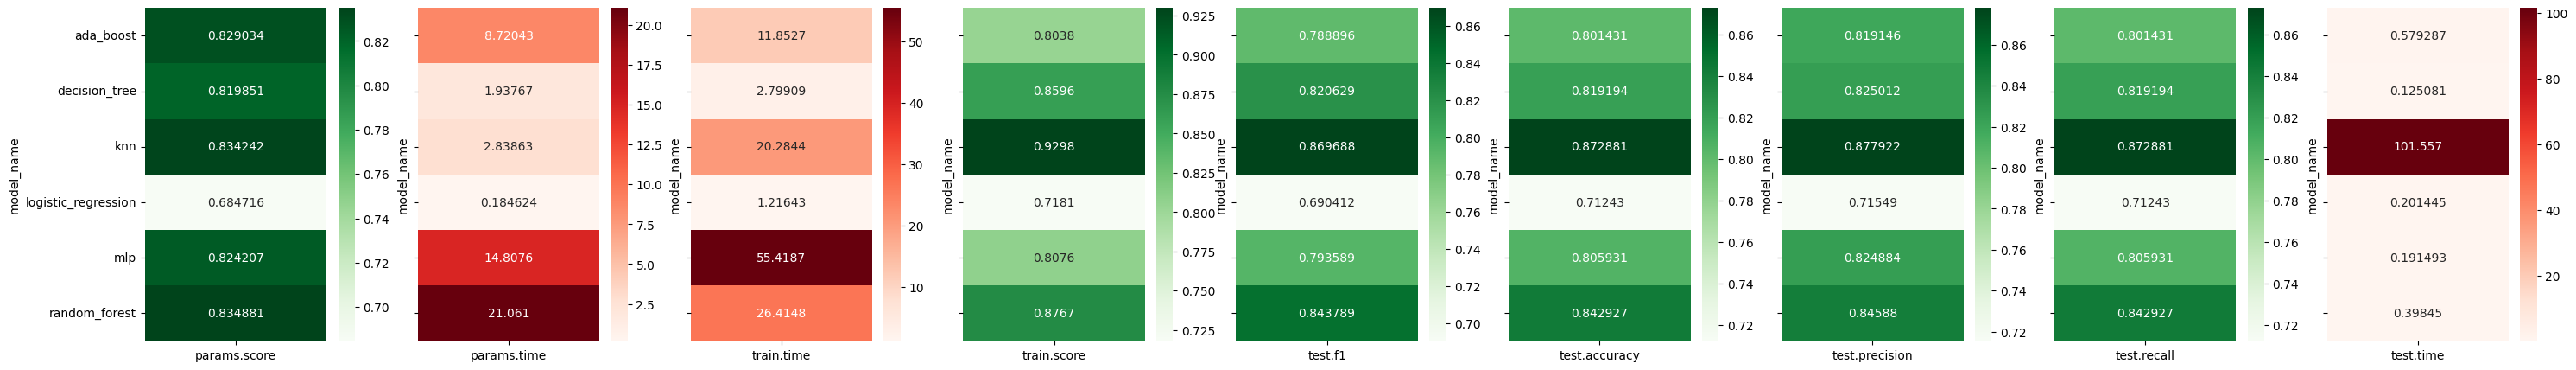

,model_name,params.score,params.time,train.time,train.score,test.f1,test.accuracy,test.precision,test.recall,test.time
0,decision_tree,0.819851,1.937670,2.799086,0.8596,0.820629,0.819194,0.825012,0.819194,0.125081
1,random_forest,0.834881,21.061002,26.414774,0.8767,0.843789,0.842927,0.845880,0.842927,0.398450
2,knn,0.834242,2.838627,20.284352,0.9298,0.869688,0.872881,0.877922,0.872881,101.556914
3,logistic_regression,0.684716,0.184624,1.216432,0.7181,0.690412,0.712430,0.715490,0.712430,0.201445
4,mlp,0.824207,14.807590,55.418700,0.8076,0.793589,0.805931,0.824884,0.805931,0.191493
5,ada_boost,0.829034,8.720430,11.852749,0.8038,0.788896,0.801431,0.819146,0.801431,0.579287


In [6]:
df = process_results('../artefacts/6/results_iot.json')
normalised = pd.json_normalize(df)
generate_heatmaps(normalised)
normalised